In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_df = pd.read_csv('moviestreams.csv')
print(raw_df)

       Unnamed: 0     ID                           Title  Year  Age  IMDb  \
0               0      1                       Inception  2010  13+   8.8   
1               1      2                      The Matrix  1999  18+   8.7   
2               2      3          Avengers: Infinity War  2018  13+   8.5   
3               3      4              Back to the Future  1985   7+   8.5   
4               4      5  The Good, the Bad and the Ugly  1966  18+   8.8   
...           ...    ...                             ...   ...  ...   ...   
16739       16739  16740       The Ghosts of Buxley Hall  1980  NaN   6.2   
16740       16740  16741                  The Poof Point  2001   7+   4.7   
16741       16741  16742           Sharks of Lost Island  2013  NaN   5.7   
16742       16742  16743              Man Among Cheetahs  2017  NaN   6.6   
16743       16743  16744                In Beaver Valley  1950  NaN   NaN   

      Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0      

In [3]:
# Checking the column names in order to know what all possible values can we use for analysis
raw_df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [4]:
#To get some basic statistical details like percent, mean, std etc. of a data frame.
raw_df.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [5]:
#prints a concise summary of a DataFrame.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16130 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [6]:
#Checking how many null or missing values does the dataset have.
raw_df.isnull().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             614
Runtime              592
dtype: int64

In [7]:
df_copy = raw_df.copy()
df_copy

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [8]:
#Data Cleaning Task 1: Age Column

raw_df["Age"] = raw_df["Age"].replace('all','13+')
raw_df["Age"] = raw_df["Age"].str.rstrip('+').astype('float')
raw_df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13.0,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18.0,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13.0,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7.0,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7.0,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [9]:
#Data Cleaning Task 2: drop Rotten Tomato column.

new_df= raw_df.drop(['Rotten Tomatoes'], axis=1)
new_df


,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13.0,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18.0,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13.0,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7.0,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7.0,4.7,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [10]:
new_df

,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13.0,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18.0,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13.0,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7.0,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7.0,4.7,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [12]:
# Treating missing values of "Age" and "Runtime" column as 0.0
new_df['Age']= new_df['Age'].fillna(0)
new_df['Runtime']=new_df['Runtime'].fillna(0) 

In [13]:
new_df.isnull().sum()

Unnamed: 0       0
ID               0
Title            0
Year             0
Age              0
IMDb           571
Netflix          0
Hulu             0
Prime Video      0
Disney+          0
Type             0
Directors      726
Genres         275
Country        435
Language       614
Runtime          0
dtype: int64

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
sns.color_palette("Set2")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [15]:
new_df.Age

0        13.0
1        18.0
2        13.0
3         7.0
4        18.0
         ... 
16739     0.0
16740     7.0
16741     0.0
16742     0.0
16743     0.0
Name: Age, Length: 16744, dtype: float64

In [16]:
new_df["Age"].value_counts()

Age
0.0     9390
18.0    3474
13.0    2098
7.0     1462
16.0     320
Name: count, dtype: int64

<BarContainer object of 4 artists>

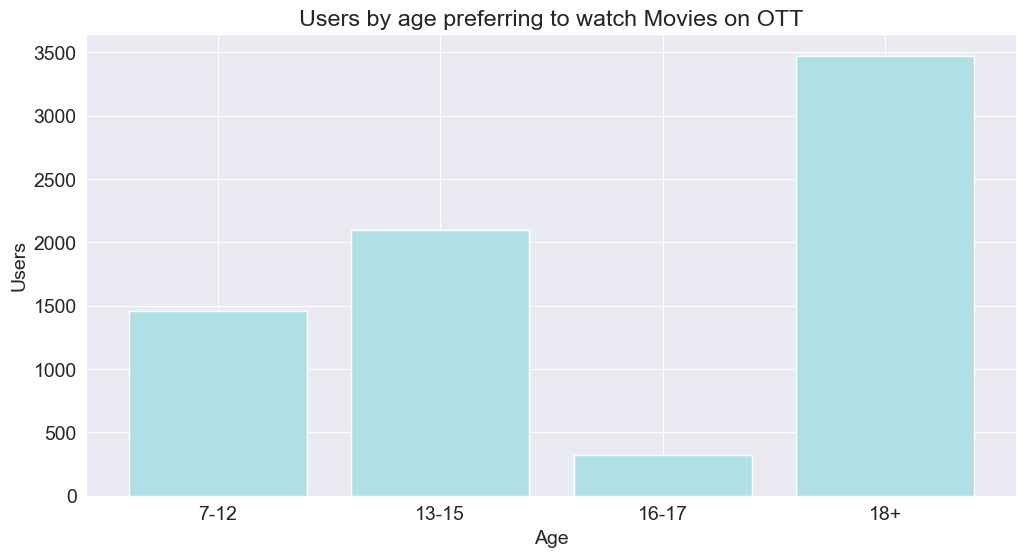

In [17]:
plt.title('Users by age preferring to watch Movies on OTT')
plt.xlabel('Age')
plt.ylabel('Users')

age_group= ['7-12', '13-15', '16-17', '18+']
values= [1462,2098,320,3474]

plt.bar(age_group, values, color="powderblue")

In [18]:
new_df.Directors

0                     Christopher Nolan
1        Lana Wachowski,Lilly Wachowski
2               Anthony Russo,Joe Russo
3                       Robert Zemeckis
4                          Sergio Leone
                      ...              
16739                      Bruce Bilson
16740                       Neal Israel
16741                      Neil Gelinas
16742              Richard Slater-Jones
16743                       James Algar
Name: Directors, Length: 16744, dtype: object

In [19]:
dir_plt = new_df.set_index('Title').Directors.str.split(',' , expand=True).stack().reset_index(level=1, drop=True);
dir_plt = dir_plt[dir_plt != 'Director Unavailable']
dir_plt.value_counts()

Jay Chapman         36
Joseph Kane         31
Cheh Chang          29
Jim Wynorski        23
William Beaudine    23
                    ..
Daniel M. Smith      1
Simon George         1
Robert Strange       1
Zhong Yu             1
Mick Garris          1
Name: count, Length: 12453, dtype: int64

In [20]:
new_df.Year

0        2010
1        1999
2        2018
3        1985
4        1966
         ... 
16739    1980
16740    2001
16741    2013
16742    2017
16743    1950
Name: Year, Length: 16744, dtype: int64

In [21]:
# oldest and latest movie year
new_df['Year'].min()

np.int64(1902)

In [22]:
new_df['Year'].max()

np.int64(2020)

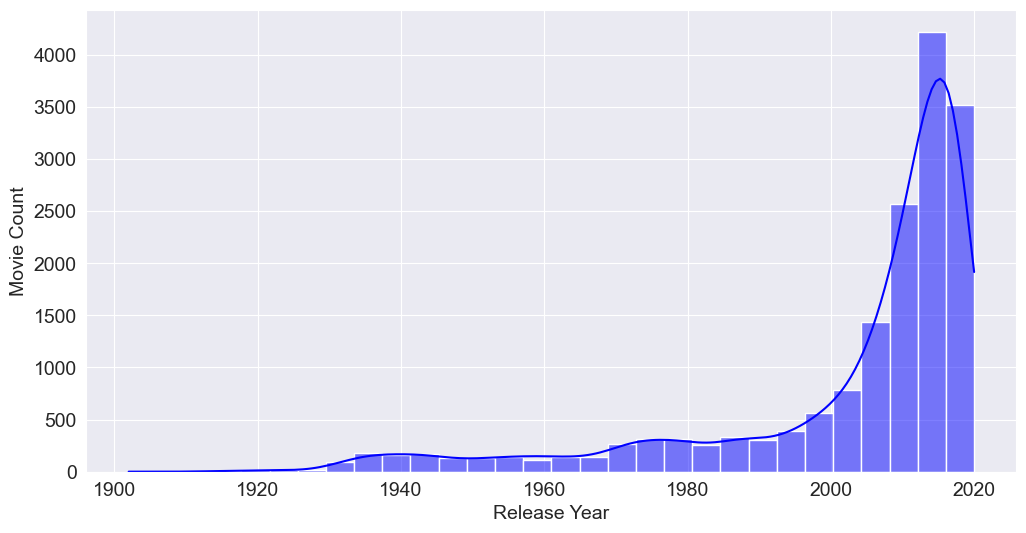

In [23]:
sns.histplot(x= new_df.Year, kde=True, color="Blue", bins=30);
plt.xlabel('Release Year')
plt.ylabel('Movie Count');
plt.show()

In [24]:
new_df.Runtime

0        148.0
1        136.0
2        149.0
3        116.0
4        161.0
         ...  
16739    120.0
16740     90.0
16741      0.0
16742      0.0
16743     32.0
Name: Runtime, Length: 16744, dtype: float64

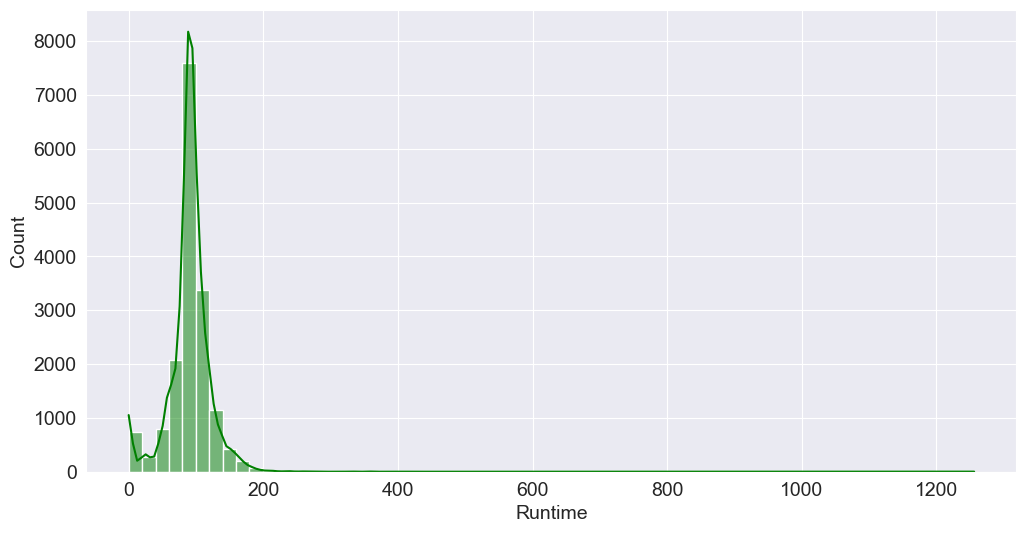

In [25]:
sns.histplot(x = new_df.Runtime, kde=True,color="green", binwidth =20);

Top5_runtime =new_df["Runtime"].value_counts().head(5)

In [26]:
#Number of movies vs rating vs country
new_df


,Unnamed: 0,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13.0,8.8,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18.0,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13.0,8.5,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7.0,8.5,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,0.0,6.2,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7.0,4.7,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,0.0,5.7,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,0.0
16742,16742,16743,Man Among Cheetahs,2017,0.0,6.6,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,0.0


In [27]:
# We can find the value_counts for each streaming services and then plot them for our analysis.
# For ex: 
new_df.Netflix.value_counts()

Netflix
0    13184
1     3560
Name: count, dtype: int64

In [28]:
new_df.Hulu.value_counts()

Hulu
0    15841
1      903
Name: count, dtype: int64

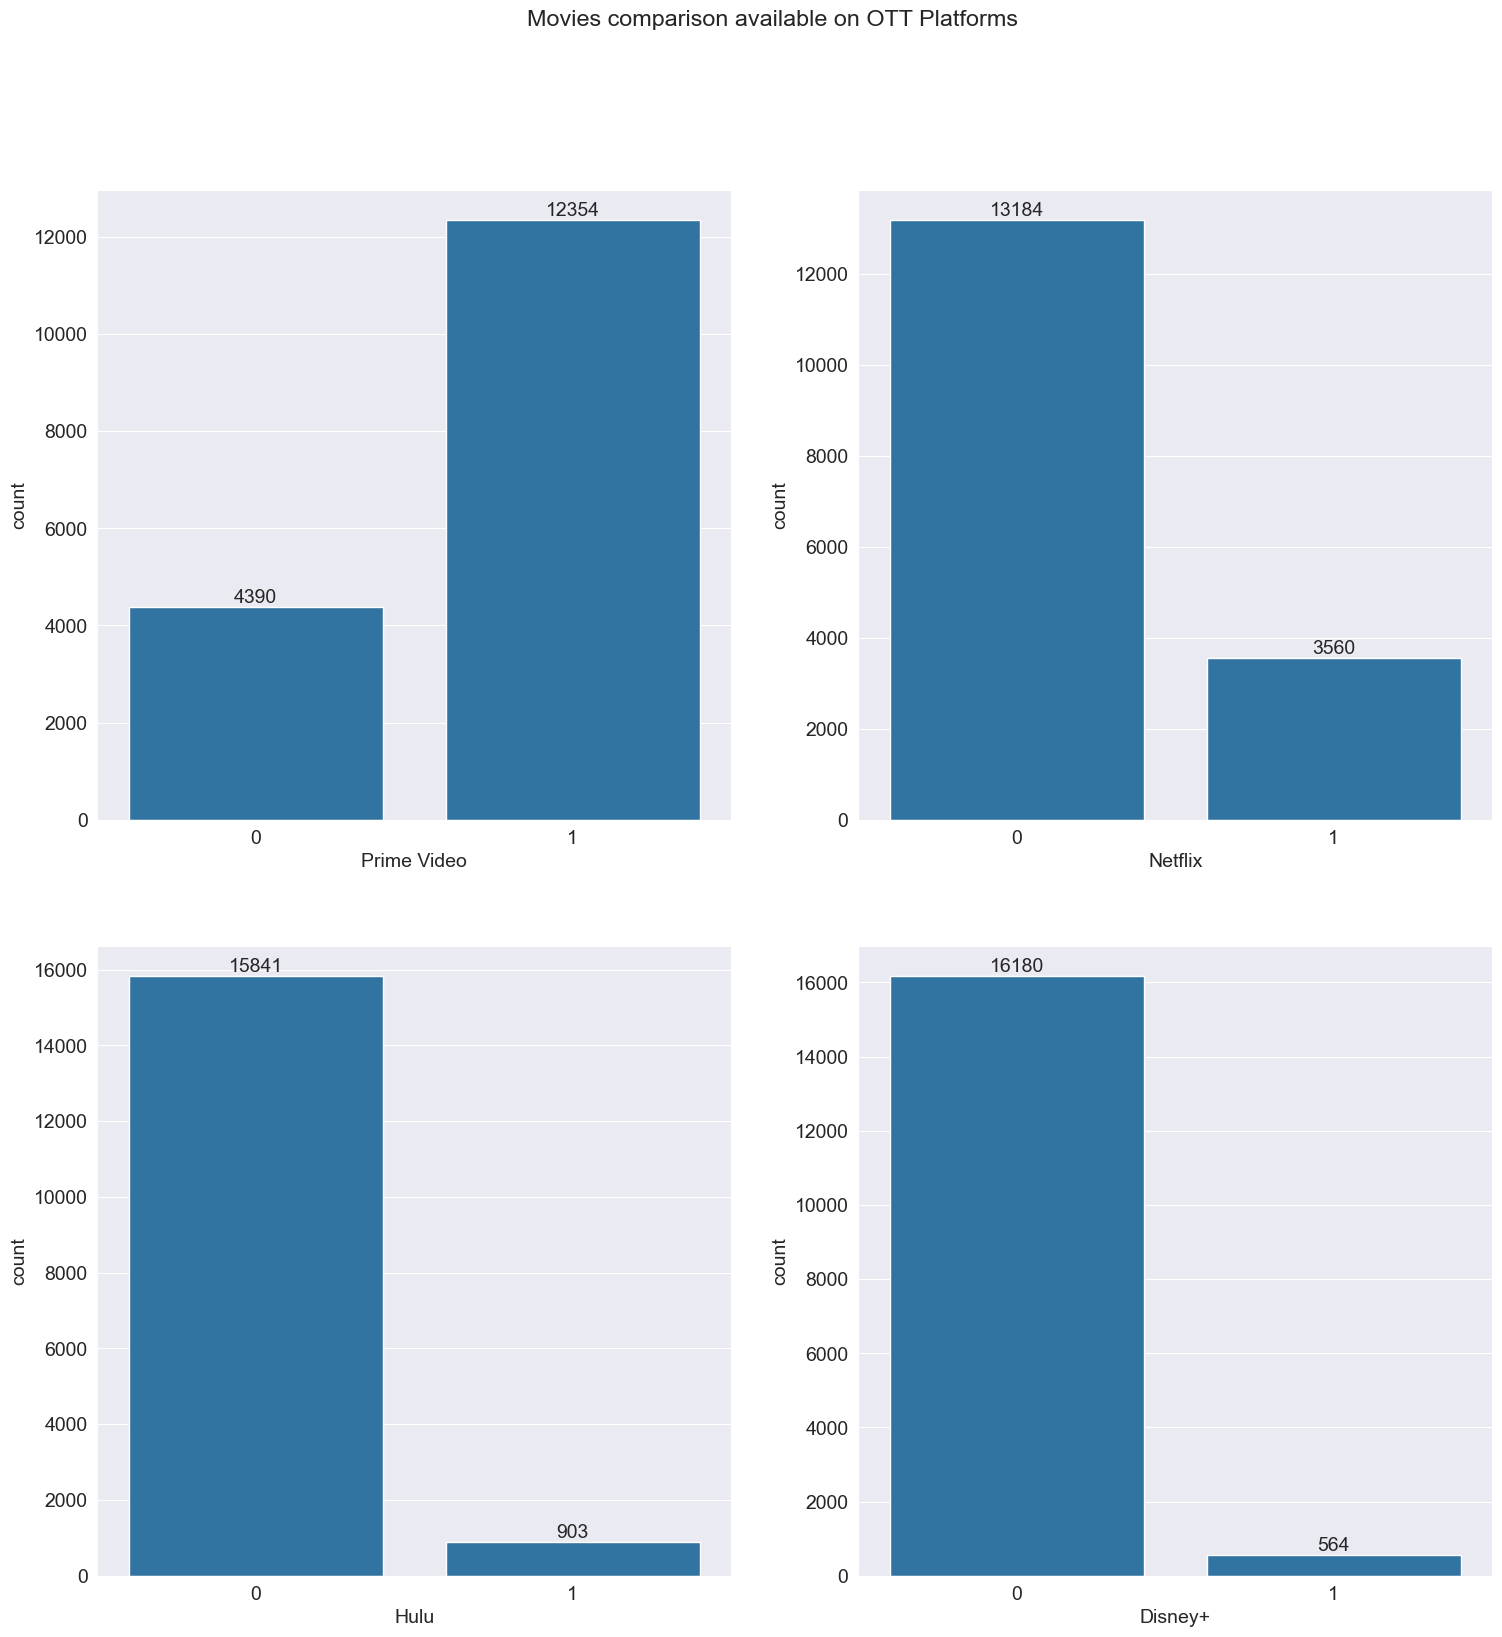

In [29]:
# Plotting all 4 platform data in subplots.

fig, axes = plt.subplots(2, 2, figsize=(18, 18))
fig.suptitle('Movies comparison available on OTT Platforms')
ax = sns.countplot(ax=axes[0, 0], x='Prime Video', data = new_df)
bx = sns.countplot(ax=axes[0, 1], x='Netflix', data = new_df)
cx = sns.countplot(ax=axes[1, 0], x='Hulu', data = new_df)
dx = sns.countplot(ax=axes[1, 1], x='Disney+', data = new_df)
# to add data labels to each bar in our plot
ax.bar_label(ax.containers[0])
bx.bar_label(bx.containers[0])
cx.bar_label(cx.containers[0])
dx.bar_label(dx.containers[0])

plt.show()
